In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix

y = np.load(f'DeepSecE/y_test_2.npy')
pred = np.load(f'DeepSecE/pred_test_2.npy')
prob = np.load(f'DeepSecE/prob_test_2.npy')
cm = confusion_matrix(y, pred)
cm

array([[133,   0,  10,   4,   2,   1],
       [  0,  19,   0,   0,   0,   1],
       [  0,   0,   9,   0,   1,   0],
       [  1,   0,   0,  28,   1,   0],
       [  0,   0,   0,   1,  29,   0],
       [  1,   0,   0,   2,   0,  17]])

In [2]:
cm[:, 4]

array([ 2,  0,  1,  1, 29,  0])

In [3]:
import pandas as pd

cnn_t4se = pd.read_csv('data/CNNT4SE-Test-260.out.csv')
cnn_t4se['Protein_ID'] = cnn_t4se['Protein_ID'].apply(lambda x: int(x.split('_')[-1]))
cnn_t4se_pred = cnn_t4se[cnn_t4se['Is_effetor'] == 'YES']


In [4]:
def get_num_of_effector(pred, start, end):
    return len(pred[(pred['Protein_ID'] > start) & (pred['Protein_ID'] <= end)])

cnn_t4se_cm = [get_num_of_effector(cnn_t4se_pred, start, end) for (start, end) in [(0, 150), (150, 170), (170, 180), (180, 210), (210, 240), (240, 260)]]
cnn_t4se_cm


[1, 10, 0, 4, 29, 1]

In [5]:
t4se_cm_df = pd.DataFrame({'DeepSecE': cm[:, 4], 'CNN-T4SE': cnn_t4se_cm}, index=['Non-effector', 'T1SE', 'T2SE', 'T3SE', 'T4SE', 'T6SE'])
t4se_cm_df


,DeepSecE,CNN-T4SE
Non-effector,2,1
T1SE,0,10
T2SE,1,0
T3SE,1,4
T4SE,29,29
T6SE,0,1


In [6]:
t3sepp = pd.read_table('data/T3SEpp-Test-260.out.txt')
t3sepp = t3sepp[t3sepp['Pred'] == 'T3S']
t3sepp_cm = [t3sepp['prot'].str.startswith('Non').sum(),
             t3sepp['prot'].str.startswith('T1SE').sum(),
             t3sepp['prot'].str.startswith('T2SE').sum(),
             t3sepp['prot'].str.startswith('T3SE').sum(),
             t3sepp['prot'].str.startswith('T4SE').sum(),
             t3sepp['prot'].str.startswith('T6SE').sum(),]

t3se_cm_df = pd.DataFrame({'DeepSecE': cm[:, 3], 'T3SEpp': t3sepp_cm}, index=['Non-effector', 'T1SE', 'T2SE', 'T3SE', 'T4SE', 'T6SE'])
t3se_cm_df

,DeepSecE,T3SEpp
Non-effector,4,5
T1SE,0,9
T2SE,0,0
T3SE,28,26
T4SE,1,12
T6SE,2,8


In [7]:
t1sestacker = pd.read_table('data/T1SEstacker-Test-260.out.txt')
t1sestacker = t1sestacker[t1sestacker['pred'] == 'T1SE']
t1sestacker_cm = [t1sestacker['prot'].str.startswith('Non').sum(),
             t1sestacker['prot'].str.startswith('T1SE').sum(),
             t1sestacker['prot'].str.startswith('T2SE').sum(),
             t1sestacker['prot'].str.startswith('T3SE').sum(),
             t1sestacker['prot'].str.startswith('T4SE').sum(),
             t1sestacker['prot'].str.startswith('T6SE').sum(), ]

t1se_cm_df = pd.DataFrame({'DeepSecE': cm[:, 1], 'T1SEstacker': t1sestacker_cm}, index=[
                          'Non-effector', 'T1SE', 'T2SE', 'T3SE', 'T4SE', 'T6SE'])
t1se_cm_df


,DeepSecE,T1SEstacker
Non-effector,0,8
T1SE,19,16
T2SE,0,2
T3SE,0,5
T4SE,0,2
T6SE,0,4


In [8]:
bastion6 = pd.read_csv('data/Bastion6-Test-260.out.csv')
bastion6 = bastion6[bastion6['T6SE']=='Yes']
bastion6_cm = [bastion6['Name'].str.startswith('>Non').sum(),
             bastion6['Name'].str.startswith('>T1SE').sum(),
             bastion6['Name'].str.startswith('>T2SE').sum(),
             bastion6['Name'].str.startswith('>T3SE').sum(),
             bastion6['Name'].str.startswith('>T4SE').sum(),
             bastion6['Name'].str.startswith('>T6SE').sum(),]
t6se_cm_df = pd.DataFrame({'DeepSecE': cm[:, 5], 'Bastion6': bastion6_cm}, index=['Non-effector', 'T1SE', 'T2SE', 'T3SE', 'T4SE', 'T6SE'])
t6se_cm_df

,DeepSecE,Bastion6
Non-effector,1,20
T1SE,1,17
T2SE,0,0
T3SE,0,24
T4SE,0,3
T6SE,17,20


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['legend.title_fontsize'] = 11
mpl.rcParams['legend.fontsize'] = 11
mpl.rcParams['xtick.labelsize'] = 11
mpl.rcParams['ytick.labelsize'] = 11

/var/folders/t8/fc7r24ds2bb9ddlc1v9786q40000gn/T/ipykernel_34516/1763529420.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, .9, 1])


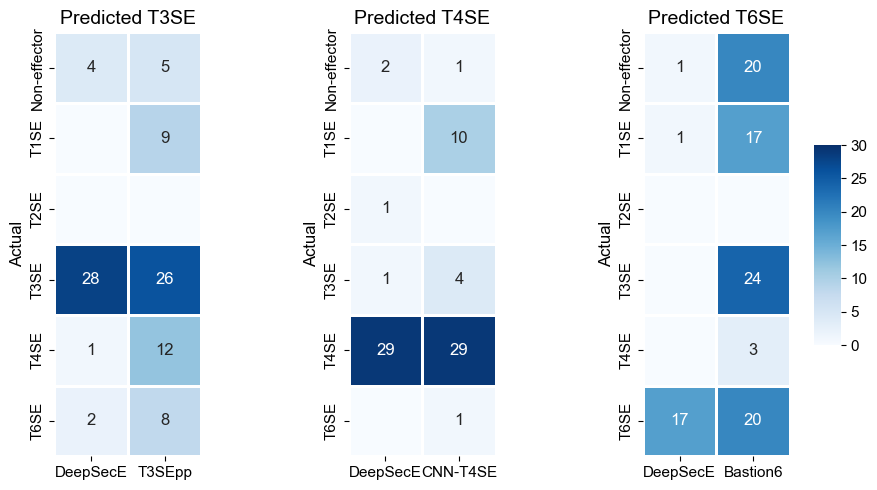

In [14]:
fig, axn = plt.subplots(1, 3, figsize=(9, 5))

cbar_ax = fig.add_axes([.91, .3, .03, .4])
    
for i, (ax, df, label) in enumerate(zip(axn.flat, [t3se_cm_df, t4se_cm_df, t6se_cm_df], ['T3SE', 'T4SE', 'T6SE'])):
    sns.heatmap(df, ax=ax,
                cbar=i == 0, cmap='Blues',
                vmin=0, vmax=30, linewidth=1, annot=True, fmt=".0f",
                annot_kws={"fontsize": 12}, 
                cbar_ax=None if i else cbar_ax)
    
    ax.set_ylabel('Actual')
    ax.set_title(f'Predicted {label}')
    for text in ax.texts:
        text_value = int(text.get_text())
        if text_value == 0:
            text.set_text("")

plt.tight_layout(rect=[0, 0, .9, 1])
plt.subplots_adjust(wspace=1.0)
plt.savefig('pdf/compare_specificity.pdf')
plt.show()


/var/folders/t8/fc7r24ds2bb9ddlc1v9786q40000gn/T/ipykernel_34516/124703160.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, .78, 1])


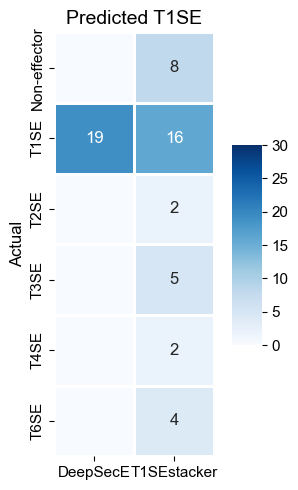

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(3, 5))

cbar_ax = fig.add_axes([.79, .3, .1, .4])

sns.heatmap(t1se_cm_df, ax=ax, cmap='Blues',
                vmin=0, vmax=30, linewidth=1, annot=True, fmt=".0f",
            annot_kws={"fontsize": 12}, cbar_ax=cbar_ax)

ax.set_ylabel('Actual')
ax.set_title('Predicted T1SE')
for text in ax.texts:
    text_value = int(text.get_text())
    if text_value == 0:
        text.set_text("")
            
plt.tight_layout(rect=[0, 0, .78, 1])
plt.savefig('pdf/compare_specificity_t1se.pdf')
plt.show()